In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_excel (r'eltrain.xlsx')

x1 = data.iloc[:, 0].values.tolist() 
x1 = np.array(x1) 
x1 = np.reshape(x1,(150,1))

x2 = data.iloc[:, 1].values.tolist() 
x2 = np.array(x2) 
x2 = np.reshape(x2,(150,1))

x3 = data.iloc[:, 2].values.tolist() 
x3 = np.array(x3) 
x3 = np.reshape(x3,(150,1))

x4 = data.iloc[:, 3].values.tolist() 
x4 = np.array(x4) 
x4 = np.reshape(x4,(150,1))



Y = data.iloc[:, 4].values.tolist() 
Y = np.array(Y)
Y = np.reshape(Y,(150,1))


X = np.stack((x1,x2,x3,x4),axis=1)
X = np.reshape(X,(150,4))

print(X)


[[10.4         2.1         0.9994      8.4       ]
 [ 7.4         4.25        0.9966     10.7       ]
 [10.4         1.5         0.99832     9.9       ]
 [ 8.3         3.4         0.99892    11.        ]
 [ 7.6         2.1         0.99476    10.9       ]
 [ 6.8         1.2         0.99471     9.8       ]
 [ 7.3         2.1         0.99705     9.7       ]
 [ 7.1         5.7         0.99808    10.2       ]
 [ 6.7         1.8         0.996       9.95      ]
 [ 7.4         4.4         0.9974      9.        ]
 [ 5.7         1.5         0.994       9.8       ]
 [ 8.8         2.8         0.9976      9.3       ]
 [ 4.6         2.1         0.9934     13.1       ]
 [ 8.3         2.1         0.9976      9.2       ]
 [ 8.3         1.5         0.9972      9.1       ]
 [ 5.          1.4         0.9938     10.5       ]
 [ 9.2         3.4         0.9996      9.4       ]
 [ 7.6         1.3         0.9965      9.2       ]
 [ 7.3         1.6         0.9956      9.        ]
 [ 7.9         1.8         0.99

In [2]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
print(X_scaled)

[[ 1.86097742e+00 -2.33149613e-01  1.68305990e+00 -1.74534635e+00]
 [-1.30082587e-01  1.05767872e+00  2.21224434e-01  1.86358160e-01]
 [ 1.86097742e+00 -5.93380776e-01  1.11920908e+00 -4.85539062e-01]
 [ 4.67235415e-01  5.47351239e-01  1.43245954e+00  4.38319618e-01]
 [ 2.65474667e-03 -2.33149613e-01 -7.39410302e-01  3.54332466e-01]
 [-5.28294588e-01 -7.73496357e-01 -7.65514507e-01 -5.69526215e-01]
 [-1.96451254e-01 -2.33149613e-01  4.56162277e-01 -6.53513367e-01]
 [-3.29188588e-01  1.92823736e+00  9.93908896e-01 -2.33577604e-01]
 [-5.94663255e-01 -4.13265195e-01 -9.20260233e-02 -4.43545486e-01]
 [-1.30082587e-01  1.14773651e+00  6.38891711e-01 -1.24142344e+00]
 [-1.25834992e+00 -5.93380776e-01 -1.13619421e+00 -5.69526215e-01]
 [ 7.99078749e-01  1.87120076e-01  7.43308530e-01 -9.89461978e-01]
 [-1.98840526e+00 -2.33149613e-01 -1.44944467e+00  2.20204983e+00]
 [ 4.67235415e-01 -2.33149613e-01  7.43308530e-01 -1.07344913e+00]
 [ 4.67235415e-01 -5.93380776e-01  5.34474892e-01 -1.15743628e

In [3]:
cov_matrix = np.cov(X_scaled.T)
print(cov_matrix)

[[ 1.00671141  0.29824371  0.64620614 -0.18750526]
 [ 0.29824371  1.00671141  0.53751157 -0.10226493]
 [ 0.64620614  0.53751157  1.00671141 -0.64374074]
 [-0.18750526 -0.10226493 -0.64374074  1.00671141]]


Percentages of contribution:  [56.62  2.98 17.23 23.17]


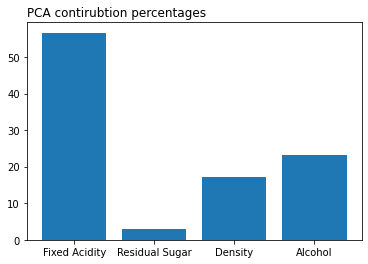

In [4]:
values, vectors = np.linalg.eig(cov_matrix)
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))

percentages = np.round(explained_variances,4)
percentages = percentages*100
print("Percentages of contribution: ", percentages)

lb = np.array(["Fixed Acidity", "Residual Sugar", "Density", "Alcohol"])


plt.bar(lb,percentages)
plt.title("PCA contirubtion percentages", loc = 'left')
plt.show()

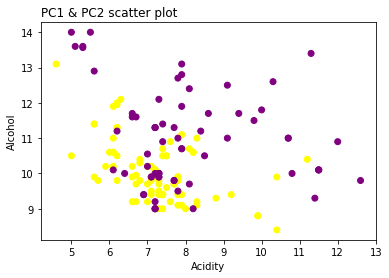

In [5]:
colors=['yellow' if l==1 else 'purple' for l in Y]
plt.scatter(x1, x4, color=colors)
plt.xlabel("Acidity")
plt.ylabel("Alcohol")
plt.title("PC1 & PC2 scatter plot", loc = 'left')
plt.show()

In [6]:
print(np.shape(X)[0])

150


In [7]:
def dis_val(XX, point):
    z = []
    point_n = np.array(point)
    for i in range(np.shape(XX)[0]):
        a = XX[i,:]- point_n
        z.append(a)
    z = np.array(z)
    z = np.power(z,2)
    zz= np.sum(z,axis=1)
    return zz


In [8]:
def minpo(ll):
    minvalue = min(ll)
    minpos = ll.index(minvalue)
    return minpos, minvalue

def ranking(rr,kk):
    us = max(rr)+100
    res = []
    rr1 = list(rr)
    for k in range(kk):
        tup_ind = minpo(rr1)
        res.append(tup_ind)
        rr[tup_ind[0]] = us
    return res

def decide(pp,yy):
    c_1 = 0
    c_2 = 0
    for hh in range(len(pp)):
        if yy[pp[hh][0]] == 1:
            c_1=c_1+1
        else:
            c_2=c_2+1
    if (c_1>c_2):
        return 1
    else:
        return 2
    
def classify(xc,yc,kc,pc):
    n1 = dis_val(xc,pc)
    n2 = ranking(n1,kc)
    n3 = decide(n2,yc)
    return n3

In [9]:
testp = [7.4, 1.8, 0.99419, 11.4]
print(classify(X,Y,10,testp))

2



Blue->1
Yellow->2



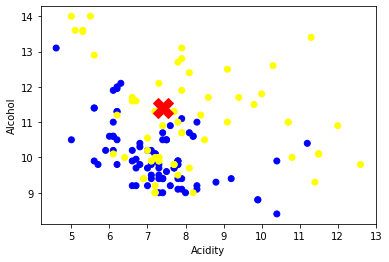

In [18]:
colors=['blue' if l==1 else 'yellow' for l in Y]
print("\nBlue->1\nYellow->2\n")
plt.scatter(x1, x4, color=colors)
plt.xlabel("Acidity")
plt.ylabel("Alcohol")
plt.plot(testp[0],testp[3], marker = 'X',color='red',ms=20)
plt.show()